In [348]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTENC


In [349]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/checkpoint_C (2).csv')


In [350]:
FLAG=["FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE", "FLAG_EMAIL"]
df[FLAG]= df[FLAG].astype("object")

#SMOTE

In [351]:
y =df.CUSTOMER_TYPE
X = pd.get_dummies(df[["AMT_INCOME_TOTAL", "CNT_FAM_MEMBERS", "AGE_BIRTH","FLAG_OWN_REALTY", "NAME_FAMILY_STATUS"]])


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)



In [352]:
sm = SMOTENC(categorical_features=[i for i in range(3,10)])
X_train, y_train = sm.fit_resample(X_train, y_train)

In [353]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         bad       0.13      0.06      0.08        79
        good       0.96      0.98      0.97      1921

    accuracy                           0.95      2000
   macro avg       0.55      0.52      0.53      2000
weighted avg       0.93      0.95      0.94      2000



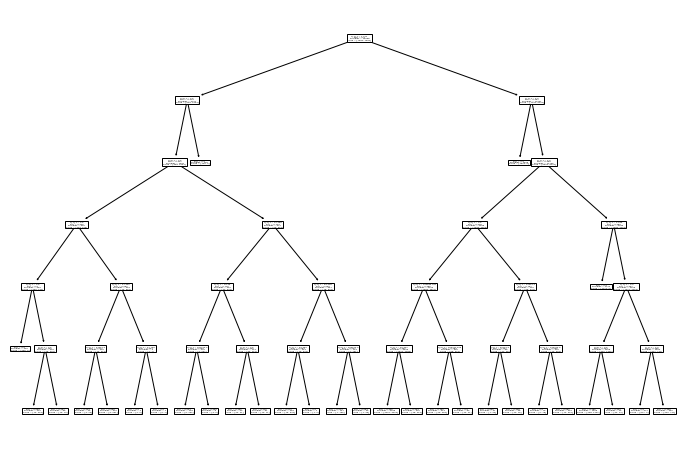

In [354]:
plt.figure(figsize=(12,8))
plot_tree(model);

In [347]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
AMT_INCOME_TOTAL,0.331822
CNT_FAM_MEMBERS,0.067004
AGE_BIRTH,0.432267
FLAG_OWN_REALTY_N,0.000000
FLAG_OWN_REALTY_Y,0.108541
NAME_FAMILY_STATUS_Civil marriage,0.000000
NAME_FAMILY_STATUS_Married,0.000000
NAME_FAMILY_STATUS_Separated,0.000000
NAME_FAMILY_STATUS_Single / not married,0.016998
NAME_FAMILY_STATUS_Widow,0.043368


#UNDERSAMPLING

In [336]:
goodcus_sample=df[df['CUSTOMER_TYPE']=='good'].sample(n=924)
bad_cus= df[df['CUSTOMER_TYPE']=='bad']

df=pd.concat([goodcus_sample, bad_cus])